<a href="https://colab.research.google.com/github/GuilhermeBorba2/Projetos-DataScience/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

In [191]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


###Ler train e test

In [192]:
train = pd.read_csv('/content/gdrive/MyDrive/udemy data science/Recursos/11 - Classificacao - Tecnicas Avancadas de ML/titanic/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/udemy data science/Recursos/11 - Classificacao - Tecnicas Avancadas de ML/titanic/test.csv')

In [193]:
train. columns 


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [194]:
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)

In [195]:
train.shape

(891, 11)

In [196]:
test.shape

(418, 10)

In [197]:
data = pd.concat([train, test], sort=True)

### Traduzir colunas

In [198]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [199]:
data.columns = ['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe', 'Sexo',
       'IrmaosConjuge', 'Sobreviveu', 'bilhete']

In [200]:
data.columns

Index(['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe',
       'Sexo', 'IrmaosConjuge', 'Sobreviveu', 'bilhete'],
      dtype='object')

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          1046 non-null   float64
 1   Cabine         295 non-null    object 
 2   Embarque       1307 non-null   object 
 3   Tarifa         1308 non-null   float64
 4   Nome           1309 non-null   object 
 5   PaisFilhos     1309 non-null   int64  
 6   Classe         1309 non-null   int64  
 7   Sexo           1309 non-null   object 
 8   IrmaosConjuge  1309 non-null   int64  
 9   Sobreviveu     891 non-null    float64
 10  bilhete        1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


Há dados nulos, em idade, Cabine, embarque, tarifa e sobreviveu

In [202]:
data.describe()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


### Mapear sexo 

In [203]:
data['Sexo']

PassengerId
1         male
2       female
3       female
4       female
5         male
         ...  
1305      male
1306    female
1307      male
1308      male
1309      male
Name: Sexo, Length: 1309, dtype: object

In [204]:
data['Sexo'] = data['Sexo'].map({'male':'homem',
                         'female':'mulher'})

In [205]:
data['Sexo']

PassengerId
1        homem
2       mulher
3       mulher
4       mulher
5        homem
         ...  
1305     homem
1306    mulher
1307     homem
1308     homem
1309     homem
Name: Sexo, Length: 1309, dtype: object

### Parâmetros Categóricos


*   **Nominais**



In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          1046 non-null   float64
 1   Cabine         295 non-null    object 
 2   Embarque       1307 non-null   object 
 3   Tarifa         1308 non-null   float64
 4   Nome           1309 non-null   object 
 5   PaisFilhos     1309 non-null   int64  
 6   Classe         1309 non-null   int64  
 7   Sexo           1309 non-null   object 
 8   IrmaosConjuge  1309 non-null   int64  
 9   Sobreviveu     891 non-null    float64
 10  bilhete        1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [207]:
#sexo, Embarque, Sobreviveu



 

*    **Ordinais**




In [208]:
#classe

### Parâmetros  Numéricos

*   **Continuos**




In [209]:
#Idade, tarifa




*  **Discretos**



In [210]:
#PaisFilhos, IrmaosConjuge

### Parâmetro alfanumerico

In [211]:
data['bilhete']

PassengerId
1                A/5 21171
2                 PC 17599
3         STON/O2. 3101282
4                   113803
5                   373450
               ...        
1305             A.5. 3236
1306              PC 17758
1307    SOTON/O.Q. 3101262
1308                359309
1309                  2668
Name: bilhete, Length: 1309, dtype: object

###Dados incompletos

In [212]:
data.isnull().sum()

Idade             263
Cabine           1014
Embarque            2
Tarifa              1
Nome                0
PaisFilhos          0
Classe              0
Sexo                0
IrmaosConjuge       0
Sobreviveu        418
bilhete             0
dtype: int64

### Preencher data com embarque

In [213]:
modaEmbarque = data['Embarque'].mode()[0]
modaEmbarque

'S'

In [214]:
data['Embarque'].fillna(modaEmbarque, inplace=True)

In [215]:
data['Embarque'].isnull().sum()

0

### Informações Gerais(Parâmetros Númericos)

In [216]:
data.describe()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


### Informações Gerais(Parâmetros Categoricos)

In [217]:
data.describe(include=['O'])

,Cabine,Embarque,Nome,Sexo,bilhete
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",homem,CA. 2343
freq,6,916,2,843,11


## Informação da Amostra

In [218]:
len(data)

1309

### Proporção Total da Amostra em relação à População

In [219]:
len(train)/2224

0.4006294964028777

### Proporção de Sobreviventes(População )

In [220]:
1-1502/2224

0.32464028776978415

In [221]:
342/len(train)

0.3838383838383838

## Agrupamento

In [222]:
#agrupar classe X sobrevivencia
data[['Classe','Sobreviveu']].groupby(['Classe'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


In [223]:
pd.crosstab(data['Classe'],data['Sobreviveu'])

Sobreviveu,0.0,1.0
Classe,,
1,80,136
2,97,87
3,372,119


In [224]:
data[['Sexo', 'Sobreviveu']].groupby(['Sexo']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Sexo,
mulher,0.742038
homem,0.188908


In [225]:
data[['IrmaosConjuge', 'Sobreviveu']].groupby(['IrmaosConjuge']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
IrmaosConjuge,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [226]:
data.columns


Index(['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe',
       'Sexo', 'IrmaosConjuge', 'Sobreviveu', 'bilhete'],
      dtype='object')

In [227]:
data[['PaisFilhos','Sobreviveu']].groupby(['PaisFilhos']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


In [228]:
data[['PaisFilhos','IrmaosConjuge']].corr()

,PaisFilhos,IrmaosConjuge
PaisFilhos,1.000000,0.373587
IrmaosConjuge,0.373587,1.000000


##Visualização de Dados

Text(0, 0.5, '')

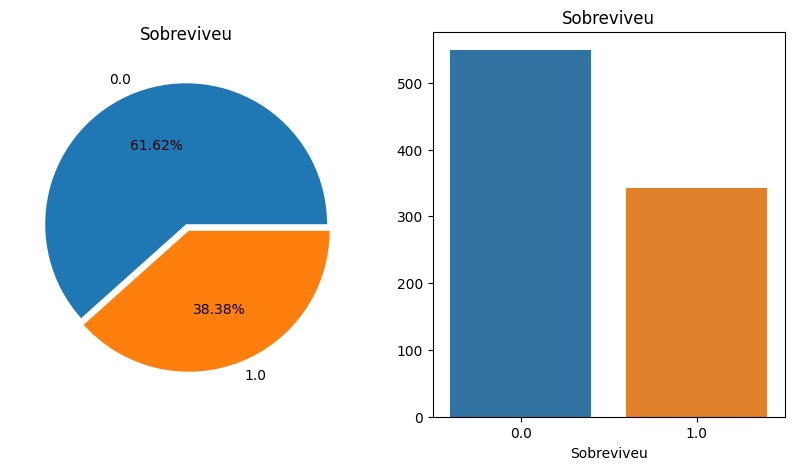

In [229]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Sobreviveu'].value_counts().plot.pie(explode=[0,0.05], autopct='%0.2f%%', ax=ax[0])
ax[0].set_title('Sobreviveu')
ax[0].set_ylabel('')
sns.countplot(x = data['Sobreviveu'], ax=ax[1])
ax[1].set_title('Sobreviveu')
ax[1].set_ylabel('')

### Sobrevivencia por Sexo

In [230]:
data.groupby(['Sobreviveu','Sexo'])['Sobreviveu'].count()

Sobreviveu  Sexo  
0.0         homem     468
            mulher     81
1.0         homem     109
            mulher    233
Name: Sobreviveu, dtype: int64

In [231]:
data.loc[data['Sexo']=='mulher']['Sobreviveu'].value_counts()

1.0    233
0.0     81
Name: Sobreviveu, dtype: int64

<Axes: xlabel='Sexo', ylabel='count'>

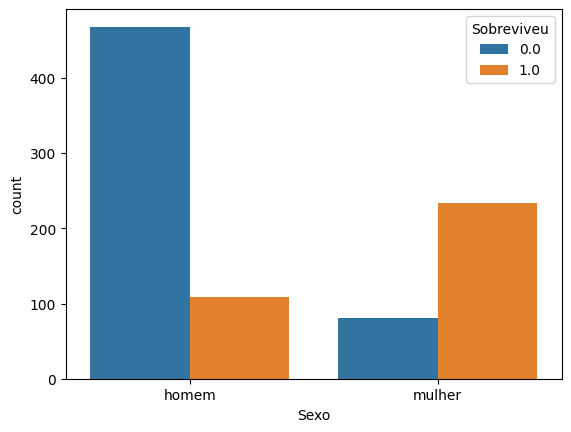

In [232]:
sns.countplot(x='Sexo', hue='Sobreviveu', data=data)

###Histograma de Idade x Sobreviveu

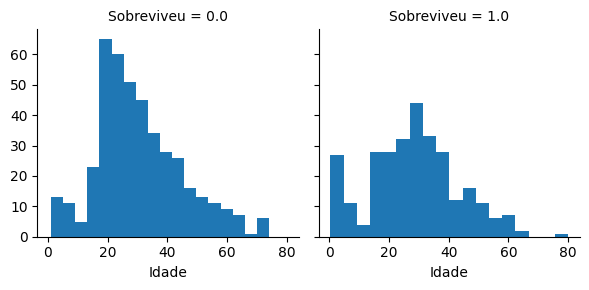

In [233]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)
plt.show()

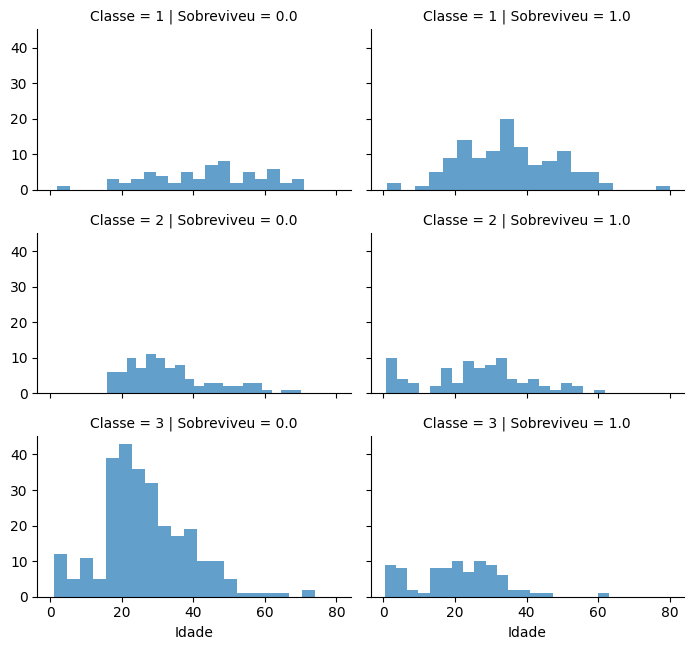

In [234]:
grid = sns.FacetGrid(data, col='Sobreviveu', row='Classe', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Idade', alpha=0.7, bins=20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

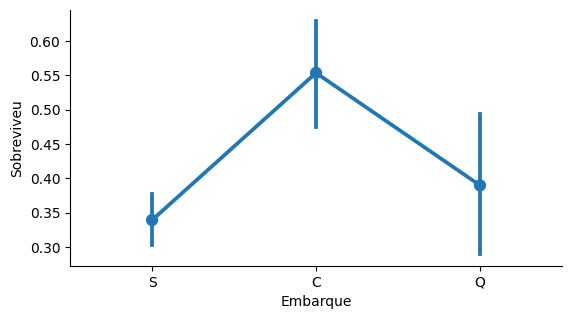

In [235]:
#chances de Sobrevivencia por ponto de Embarque
sns.catplot(x='Embarque',y ='Sobreviveu', data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)
plt.show

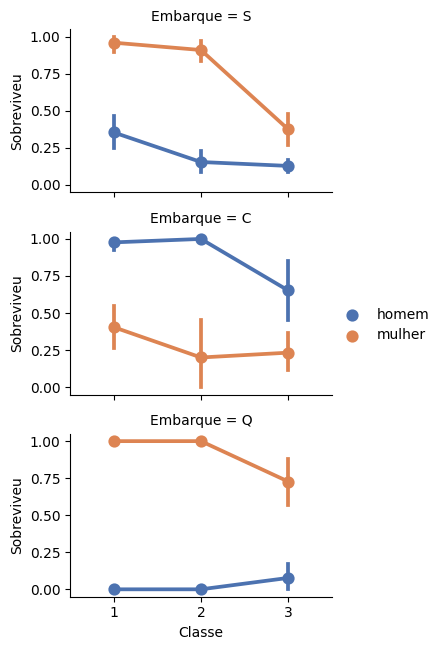

In [236]:
#embarqueXClasseXSobreviveu
grid = sns.FacetGrid(data, row='Embarque', height=2.2 , aspect=1.6)
grid.map(sns.pointplot, 'Classe', 'Sobreviveu','Sexo', palette='deep')
grid.add_legend ()
plt.show()

In [237]:
#agrupar mulher por sobrevivencia
data.loc[data['Sexo']=='mulher'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,25.046875,23.024385,1.037037,2.851852,1.209877
1.0,28.847716,51.938573,0.515021,1.918455,0.515021


In [238]:
#agrupar homens por sobrevivencia
data.loc[data['Sexo']=='homem'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,31.618056,21.960993,0.207265,2.476496,0.440171
1.0,27.276022,40.821484,0.357798,2.018349,0.385321


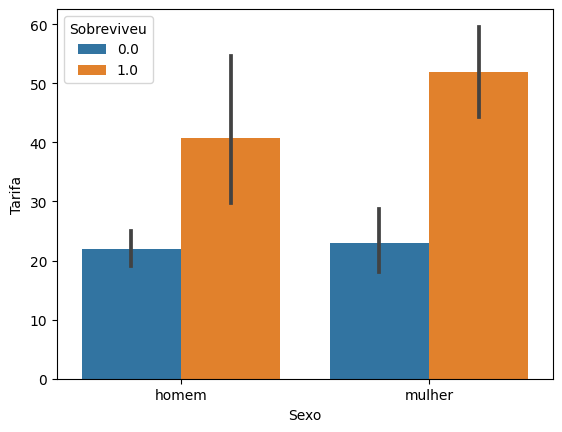

In [239]:
sns.barplot(x='Sexo', y='Tarifa', hue="Sobreviveu", data=data)
plt.show()

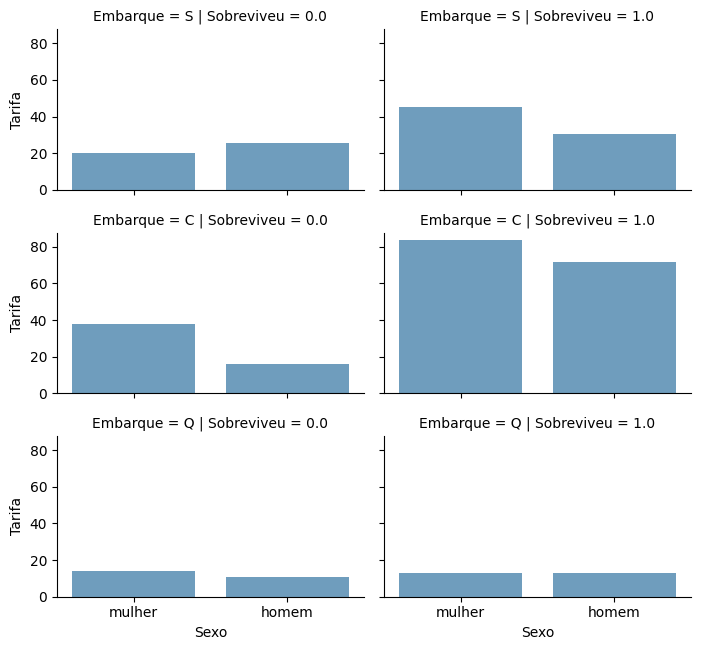

In [240]:
#grafico de barras Sexo X Tarifa X Embarque X Sobreviveu
grid = sns.FacetGrid(data, row='Embarque', col='Sobreviveu', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.7, ci=None )
grid.add_legend()
plt.show()

In [241]:
#crossbat sobrevivencia por classe
pd.crosstab(data['Sobreviveu'], data['Classe'], margins=True).style.background_gradient(cmap='OrRd')

Classe,1,2,3,All
Sobreviveu,,,,
0.000000,80,97,372,549
1.000000,136,87,119,342
All,216,184,491,891


<Axes: ylabel='PassengerId'>

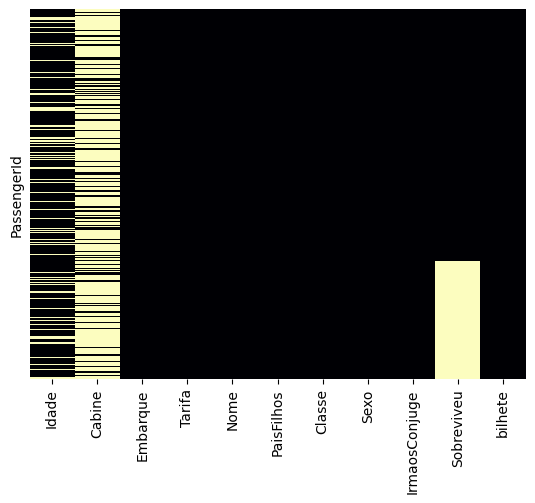

In [242]:
#vizualizando dados faltando 
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

In [243]:
data.drop(['Cabine'], axis=1, inplace=True)

<Axes: xlabel='Classe', ylabel='Idade'>

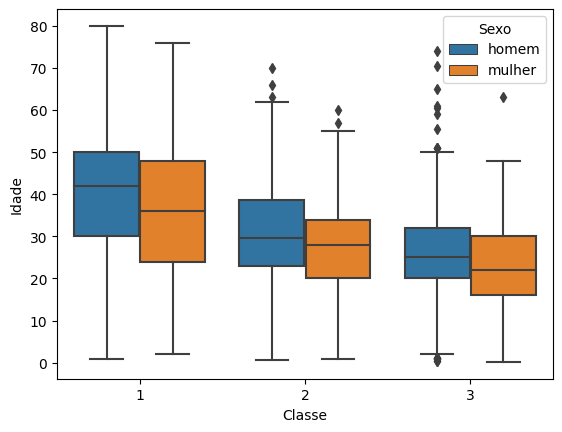

In [244]:
#boxplot de classes por sexo

sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)

### Engenharia de Recurso I

In [245]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [246]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [247]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [248]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss','Master','Mr','Mrs'] else x)

In [249]:
data['Titulo']

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
         ...  
1305        Mr
1306    Outros
1307        Mr
1308        Mr
1309    Master
Name: Titulo, Length: 1309, dtype: object

In [250]:
pd.crosstab(data['Titulo'],data['Sexo'] )

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


In [251]:
titulos_traduzidos = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'Casada',
    'Outros': 'Outros'
}

In [252]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

## Mulheres  e Crianças sobreviveram ou morreram juntos?

In [253]:
#extrair nomes para identificar possiveis familias
data['Nome']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Nome, Length: 1309, dtype: object

In [254]:
data['Sobrenome'] = data['Nome'].str.split(',').str[0]

In [255]:
data.groupby(data['Sobrenome'])['Nome'].count().sort_values(ascending=False)

Sobrenome
Andersson         11
Sage              11
Goodwin            8
Asplund            8
Davies             7
                  ..
Humblen            1
Hunt               1
Hyman              1
Ibrahim Shawah     1
van Melkebeke      1
Name: Nome, Length: 875, dtype: int64

In [256]:
data.columns

Index(['Idade', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe', 'Sexo',
       'IrmaosConjuge', 'Sobreviveu', 'bilhete', 'Titulo', 'Sobrenome'],
      dtype='object')

In [257]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'bilhete']].loc[data['Sobrenome']=='Andersson'].loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,bilhete
PassengerId,,,,
69,1.0,Solteira,Andersson,3101281
120,0.0,Solteira,Andersson,347082
542,0.0,Solteira,Andersson,347082
543,0.0,Solteira,Andersson,347082
611,0.0,Casada,Andersson,347082
814,0.0,Solteira,Andersson,347082
851,0.0,Menino,Andersson,347082
1106,NaN,Solteira,Andersson,347091


In [258]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'bilhete']].loc[data['Sobrenome']=='Sage'].loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,bilhete
PassengerId,,,,
160,0.0,Menino,Sage,CA. 2343
181,0.0,Solteira,Sage,CA. 2343
793,0.0,Solteira,Sage,CA. 2343
864,0.0,Solteira,Sage,CA. 2343
1080,NaN,Solteira,Sage,CA. 2343
1252,NaN,Menino,Sage,CA. 2343
1257,NaN,Casada,Sage,CA. 2343


In [259]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'bilhete']].loc[data['Sobrenome']=='Brown'].loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,bilhete
PassengerId,,,,
195,1.0,Casada,Brown,PC 17610
346,1.0,Solteira,Brown,248733
671,1.0,Casada,Brown,29750
1067,NaN,Solteira,Brown,29750
1248,NaN,Casada,Brown,11769


In [260]:
#criar DataFrame  'MulherouCriança'
mulherouCrianca = data.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]
mulherouCrianca['Titulo'].unique()

array(['Casada', 'Solteira', 'Menino', 'Outros'], dtype=object)

### Criar feature "TamanhoGrupo"
Referente a quantidade de pessoas que possuem o mesmo sobrenome

In [261]:
mulherouCrianca.loc[mulherouCrianca['Sobrenome']=='Brown']['Sobreviveu'].count()

3

In [262]:
#calcular  a quantidade de sobrenomes 
data['TamanhoGrupo'] = data['Sobrenome'].apply(lambda x: mulherouCrianca.loc[mulherouCrianca['Sobrenome']==x]['Sobreviveu'].count() )

## Sobrevivencia familia Anderson

In [263]:
data[['TamanhoGrupo', 'Sobrenome','Titulo', 'Sobreviveu']].sort_values(by='TamanhoGrupo', ascending=False ).head(10)

,TamanhoGrupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
1212,7,Andersson,HomemAdulto,NaN
69,7,Andersson,Solteira,1.0
611,7,Andersson,Casada,0.0
120,7,Andersson,Solteira,0.0
147,7,Andersson,HomemAdulto,1.0
1106,7,Andersson,Solteira,NaN
814,7,Andersson,Solteira,0.0
543,7,Andersson,Solteira,0.0
851,7,Andersson,Menino,0.0


In [264]:
for idx, _ in data.iterrows():
  if data['Titulo'].at[idx] == 'homemAdulto':
    data['TamanhoGrupo'].at[idx]= 0

## Criar recurso "SobrevivenciaGrupo"

In [265]:
data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome']=='Andersson'].loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')].mean()['Sobreviveu']

0.14285714285714285

In [266]:
data['SobrevivenciaGrupo']= data['Sobrenome'].apply(lambda x: data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome']==x].loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')].mean()['Sobreviveu'])

In [267]:
data[['SobrevivenciaGrupo', 'Titulo']]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,NaN,HomemAdulto
2,1.0,Casada
3,1.0,Solteira
4,1.0,Casada
5,1.0,HomemAdulto
...,...,...
1305,NaN,HomemAdulto
1306,NaN,Outros
1307,NaN,HomemAdulto


In [268]:
for idx, _ in data.iterrows():
  if data['Titulo'].at[idx] =='HomemAdulto':
    data['SobrevivenciaGrupo'].at[idx]=0


In [269]:
data[['SobrevivenciaGrupo', 'Titulo']]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,0.0,HomemAdulto
2,1.0,Casada
3,1.0,Solteira
4,1.0,Casada
5,0.0,HomemAdulto
...,...,...
1305,0.0,HomemAdulto
1306,NaN,Outros
1307,0.0,HomemAdulto


In [270]:
data['SobrevivenciaGrupo'].isnull().sum()

119

In [271]:
data['SobrevivenciaGrupo'].fillna(0, inplace=True)

In [272]:
data['SobrevivenciaGrupo'].isnull().sum()

0

### Grupo de mulheres e criancas onde todos morreram juntos

In [273]:
data[['Sobrenome', 'Titulo']].loc[(data['SobrevivenciaGrupo']==0) & (data['TamanhoGrupo']>1)].loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Palsson', 'Rice', 'Vander Planke', 'Panula', 'Goodwin', 'Skoog',
       'Zabour', 'Jussila', 'Boulos', 'Ford', 'Sage', 'Lefebre', 'Strom',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

Quantidade de Pessoas (morreram)

In [274]:
data[['Sobrenome', 'Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo']==0) & (data['TamanhoGrupo']>1)].loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

50

## Grupo de mulheres e criancas onde todos sobreviveram juntos

In [275]:
data[['Sobrenome', 'Titulo']].loc[(data['SobrevivenciaGrupo']==1) & (data['TamanhoGrupo']>1)].loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Johnson', 'Sandstrom', 'Nicola-Yarred', 'Laroche', 'Harper',
       'West', 'Moubarek', 'Caldwell', 'Fortune', 'Doling', 'Peter',
       'Goldsmith', 'Becker', 'Navratil', 'Brown', 'Newell', 'Collyer',
       'Murphy', 'Hamalainen', 'Graham', 'Mellinger', 'Kelly', 'Hays',
       'Ryerson', 'Wick', 'Hippach', 'Coutts', 'Richards', 'Hart',
       'Baclini', 'Quick', 'Taussig', 'Herman', 'Moor'], dtype=object)

##Quantidade de pessoas que (sobreviveram)

In [276]:
data[['Sobrenome', 'Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo']==1) & (data['TamanhoGrupo']>1)].loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

74

## Grupos de mulheres e criancas com sobevivencia mista

In [277]:

data[['Sobrenome', 'Titulo']].loc[(data["SobrevivenciaGrupo"]>0) & (data["SobrevivenciaGrupo"]<1) & (data['TamanhoGrupo']>1)].loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()



array(['Asplund', 'Andersson', 'Allison', 'Carter'], dtype=object)

### Quantidade de pessoas com sobevivencia mista

In [278]:
data[['Sobrenome', 'Titulo','Sobreviveu']].loc[(data["SobrevivenciaGrupo"]>0) & (data["SobrevivenciaGrupo"]<1) & (data['TamanhoGrupo']>1)].loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

18

### Criar Recurso Expectativa de Vida

In [279]:

#viver
#morrer
#desconhecida
data['ExpectativaDeVidaa'] = ''
for idx, _ in data.iterrows():
    if (data['SobrevivenciaGrupo'].at[idx]==0) & (data['TamanhoGrupo'].at[idx] > 1):
        data['ExpectativaDeVidaa'].at[idx] = 'morrer'
    elif  (data['SobrevivenciaGrupo'].at[idx]==1) & (data['TamanhoGrupo'].at[idx] > 1):
        data['ExpectativaDeVidaa'].at[idx] = 'viver'
    else:
        data['ExpectativaDeVidaa'].at[idx] = 'desconhecida'


In [280]:
pd.crosstab(data['ExpectativaDeVidaa'],data['Sobreviveu'])

Sobreviveu,0.0,1.0
ExpectativaDeVidaa,,
desconhecida,468,264
morrer,80,4
viver,1,74


### Remover Colunas que não serão mais utilizadas

In [281]:
data.isnull().sum()

Idade                 263
Embarque                0
Tarifa                  1
Nome                    0
PaisFilhos              0
Classe                  0
Sexo                    0
IrmaosConjuge           0
Sobreviveu            418
bilhete                 0
Titulo                  0
Sobrenome               0
TamanhoGrupo            0
SobrevivenciaGrupo      0
ExpectativaDeVidaa      0
dtype: int64

In [282]:
data.drop(['Nome','bilhete', 'Sobrenome'], axis=1, inplace=True)

In [283]:
data.isnull().sum()

Idade                 263
Embarque                0
Tarifa                  1
PaisFilhos              0
Classe                  0
Sexo                    0
IrmaosConjuge           0
Sobreviveu            418
Titulo                  0
TamanhoGrupo            0
SobrevivenciaGrupo      0
ExpectativaDeVidaa      0
dtype: int64

In [284]:
data.describe(include=['O'])

,Embarque,Sexo,Titulo,ExpectativaDeVidaa
count,1309,1309,1309,1309
unique,3,2,5,3
top,S,homem,HomemAdulto,desconhecida
freq,916,843,757,1109


In [285]:
data = pd.get_dummies(data, columns=['Classe', 
                                   'Embarque', 
                                   'Titulo', 
                                   'ExpectativaDeVidaa',
                                   'Sexo'], drop_first=True)

In [286]:
data.columns

Index(['Idade', 'Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'Sobreviveu',
       'TamanhoGrupo', 'SobrevivenciaGrupo', 'Classe_2', 'Classe_3',
       'Embarque_Q', 'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino',
       'Titulo_Outros', 'Titulo_Solteira', 'ExpectativaDeVidaa_morrer',
       'ExpectativaDeVidaa_viver', 'Sexo_mulher'],
      dtype='object')

In [287]:
data.shape

(1309, 18)

### Usar Predição da idade 

In [288]:
data.drop('Idade', axis=1, inplace=True)

In [289]:
data.shape

(1309, 17)

In [290]:
idade = pd.read_csv('/content/gdrive/MyDrive/udemy data science/Recursos/idade_completa.csv')

In [291]:
idade.set_index('IdPassageiro', inplace=True)

In [292]:
idade.shape

(1309, 1)

In [293]:
data = pd.concat([data, idade], axis=1)

In [294]:
data.shape

(1309, 18)

In [295]:
tarifa_media = data['Tarifa'].mean()

In [296]:
data['Tarifa'].fillna(tarifa_media, inplace=True)

In [297]:
data.isnull().sum()

Tarifa                         0
PaisFilhos                     0
IrmaosConjuge                  0
Sobreviveu                   418
TamanhoGrupo                   0
SobrevivenciaGrupo             0
Classe_2                       0
Classe_3                       0
Embarque_Q                     0
Embarque_S                     0
Titulo_HomemAdulto             0
Titulo_Menino                  0
Titulo_Outros                  0
Titulo_Solteira                0
ExpectativaDeVidaa_morrer      0
ExpectativaDeVidaa_viver       0
Sexo_mulher                    0
Idade                          0
dtype: int64

### Criar Faixa Etária

In [298]:
data['Idade'].astype('int')

1       22
2       38
3       26
4       35
5       35
        ..
1305    29
1306    39
1307    38
1308    29
1309     0
Name: Idade, Length: 1309, dtype: int64

In [299]:
data['FaixaEtaria'] = pd.cut(data['Idade'].astype('int'), bins=5)

In [300]:
pd.crosstab(data['FaixaEtaria'], data['Sobreviveu'])

Sobreviveu,0.0,1.0
FaixaEtaria,,
"(-0.08, 16.0]",55,58
"(16.0, 32.0]",318,165
"(32.0, 48.0]",127,88
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


### Dummy Faixa Etária

In [301]:
data = pd.get_dummies(data, columns=['FaixaEtaria'], drop_first=True)

In [302]:
data.shape

(1309, 22)

In [303]:
data.columns


Index(['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'Sobreviveu', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVidaa_morrer',
       'ExpectativaDeVidaa_viver', 'Sexo_mulher', 'Idade',
       'FaixaEtaria_(16.0, 32.0]', 'FaixaEtaria_(32.0, 48.0]',
       'FaixaEtaria_(48.0, 64.0]', 'FaixaEtaria_(64.0, 80.0]'],
      dtype='object')

###Criar Recursos 'Familiares' (Feature Engeneering)
baseado em Irmão Conjuge e PaisFilhos

In [304]:
data['Familiares'] = data['IrmaosConjuge']+data['PaisFilhos']

<Axes: >

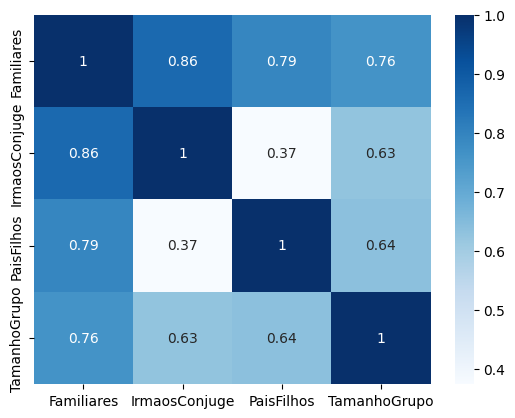

In [305]:
sns.heatmap(data[['Familiares', 'IrmaosConjuge','PaisFilhos', 'TamanhoGrupo']].corr(), annot=True, cmap='Blues')

###Criar Parâmatro 'Sozinho'(Feature engeneering)

In [306]:
sozinho = data['Familiares']==0

In [307]:
data['Sozinho']= sozinho.map({True: 1, False:0 })

In [308]:
data.shape

(1309, 24)

###Train e Test

In [309]:
train  = data.loc[train.index]

In [310]:
train.shape

(891, 24)

In [311]:
test = data.loc[test.index]
test.shape

(418, 24)

In [312]:
test.drop('Sobreviveu', axis=1, inplace=True)

In [313]:
test.shape

(418, 23)

In [314]:
test.isnull().sum()

Tarifa                       0
PaisFilhos                   0
IrmaosConjuge                0
TamanhoGrupo                 0
SobrevivenciaGrupo           0
Classe_2                     0
Classe_3                     0
Embarque_Q                   0
Embarque_S                   0
Titulo_HomemAdulto           0
Titulo_Menino                0
Titulo_Outros                0
Titulo_Solteira              0
ExpectativaDeVidaa_morrer    0
ExpectativaDeVidaa_viver     0
Sexo_mulher                  0
Idade                        0
FaixaEtaria_(16.0, 32.0]     0
FaixaEtaria_(32.0, 48.0]     0
FaixaEtaria_(48.0, 64.0]     0
FaixaEtaria_(64.0, 80.0]     0
Familiares                   0
Sozinho                      0
dtype: int64

In [315]:
train.isnull().sum()

Tarifa                       0
PaisFilhos                   0
IrmaosConjuge                0
Sobreviveu                   0
TamanhoGrupo                 0
SobrevivenciaGrupo           0
Classe_2                     0
Classe_3                     0
Embarque_Q                   0
Embarque_S                   0
Titulo_HomemAdulto           0
Titulo_Menino                0
Titulo_Outros                0
Titulo_Solteira              0
ExpectativaDeVidaa_morrer    0
ExpectativaDeVidaa_viver     0
Sexo_mulher                  0
Idade                        0
FaixaEtaria_(16.0, 32.0]     0
FaixaEtaria_(32.0, 48.0]     0
FaixaEtaria_(48.0, 64.0]     0
FaixaEtaria_(64.0, 80.0]     0
Familiares                   0
Sozinho                      0
dtype: int64

###Utilizar o train  para treinar o modelo 

In [316]:
X = train.drop('Sobreviveu', axis=1)

In [317]:
y = train['Sobreviveu']

In [318]:
X.shape, y.shape

((891, 23), (891,))

Escolher colunas

In [319]:
X.columns

Index(['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVidaa_morrer',
       'ExpectativaDeVidaa_viver', 'Sexo_mulher', 'Idade',
       'FaixaEtaria_(16.0, 32.0]', 'FaixaEtaria_(32.0, 48.0]',
       'FaixaEtaria_(48.0, 64.0]', 'FaixaEtaria_(64.0, 80.0]', 'Familiares',
       'Sozinho'],
      dtype='object')

In [320]:
recursos = ['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVidaa_morrer',
       'ExpectativaDeVidaa_viver', 'Sexo_mulher', 'Idade', 'Familiares',
       'Sozinho']

In [321]:
X = X[recursos]
X .shape, y.shape

((891, 19), (891,))

###Importar train_test_split para dividir e preprarar para treino

In [322]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


##Machine Learning

### Importando Modelos Preditivos

In [324]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [325]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

###Criar classe ModeloAuxiliar
Uma classe modelo para evitar duplicação de códigos

In [326]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [327]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [328]:
resultados = []
for model in modelos:
  x = ModeloAuxiliar(clf=model['modelo'])
  
  #treinar modelo
  x.fit(X_train, y_train)
  
  #gerar predição
  x_pred = x.predict(X_test)
  
  #gerar Score
  acuracidade = round(x.score(X_test, y_test)*100,2)

  resultados.append({
      'nome': model['nome'],
      'score': acuracidade,
      'pred': x_pred})
  

###Ranking de Modelos por Score

In [329]:
models = pd.DataFrame(resultados)
models[['nome','score']].sort_values(by='score', ascending=False)


,nome,score
2,gradboost,91.79
8,LinearSVC,90.67
0,logreg,89.93
3,adaboost,89.93
6,GaussianNB,87.69
7,Perceptron,86.57
11,RForest,85.82
1,etree,84.33
10,Dtree,83.58
5,KNN,74.25


## Validação Cruzada (Cross-Validation)

In [330]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [331]:
kfold = KFold(n_splits=10)

In [332]:
ada = AdaBoostClassifier(n_estimators=200, random_state=123, learning_rate=0.1)

In [333]:
resultado = cross_val_score(ada, X_train, y_train, cv=kfold, scoring='accuracy')
print('O score cross-validado, do  AdaBoost é:', resultado.mean())

O score cross-validado, do  AdaBoost é: 0.8891193036354327


In [334]:
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=123)

In [335]:
ada_pred = ada.predict(X_test)
ada_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

### Matriz de Confusão
Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão (Confusion Matrix) que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.

In [336]:
from sklearn.metrics import confusion_matrix

In [337]:
confusion_matrix(y_test , ada_pred)

array([[166,   4],
       [ 22,  76]])

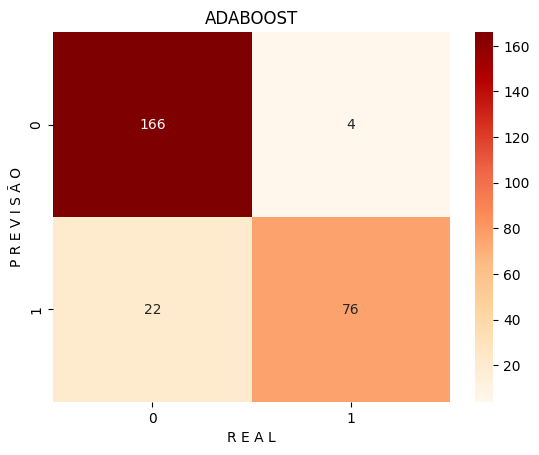

In [338]:
sns.heatmap(confusion_matrix(y_test, ada_pred), annot=True, cmap='OrRd', fmt='')
plt.title('ADABOOST')
plt.ylabel('P R E V I S Ã O')
plt.xlabel('R E A L')
plt.show()

### Interpretando a Matriz de Confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.

O número de predições corretas para AdaBoost é de 166(para mortos) + 76(sobreviventes).


Erros

Classificou erradamente 4 como mortos (falso negativo)
E 22 como vivos (falso positivo)

In [339]:
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

In [340]:
accuracy_score(y_test, ada_pred)

0.9029850746268657

In [341]:
recall_score(y_test, ada_pred)

0.7755102040816326

In [342]:
precision_score(y_test, ada_pred)

0.95

In [343]:
f1_score(y_test, ada_pred)

0.8539325842696629

### Curvas ROC e AUC
O formato da curva contem várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos.

O quanto menor for o eixo x menor a quantidade de falsos positivos e maior verdadeiros negativos.
Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.

In [344]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Sem Habilidade: ROC AUC=0.500
AdaBoost: ADA AUC=0.937


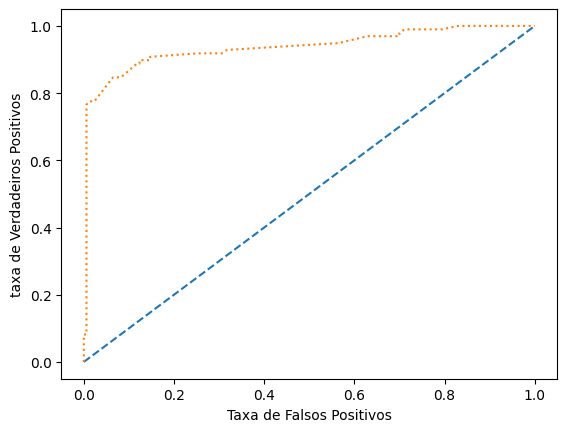

In [345]:
# gerando um modelo sem habilidade -> ns = no skill
ns_probs = [0 for _ in range(len(y_test))]

ada_probs = ada.predict_proba(X_test)

ada_probs = ada_probs[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
ada_auc = roc_auc_score(y_test, ada_probs)

print('Sem Habilidade: ROC AUC=%.3f' %(ns_auc))
print('AdaBoost: ADA AUC=%.3f' %(ada_auc))

#calcular a curva ROC
ns_tfp, ns_tvp, _ = roc_curve(y_test, ns_probs)
ada_tfp, ada_tvp, _ = roc_curve(y_test, ada_probs)

plt.plot(ns_tfp, ns_tvp, linestyle='--', label='Sem Habilidade')
plt.plot(ada_tfp, ada_tvp, linestyle='dotted', label='AdaBoost')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('taxa de Verdadeiros Positivos')
plt.show()

## Selecionando Threshold (Limite)

In [346]:
pred_proba = ada_probs >= 0.5


In [347]:
pd.Series(pred_proba).map({True:1, False:0}).values

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1])

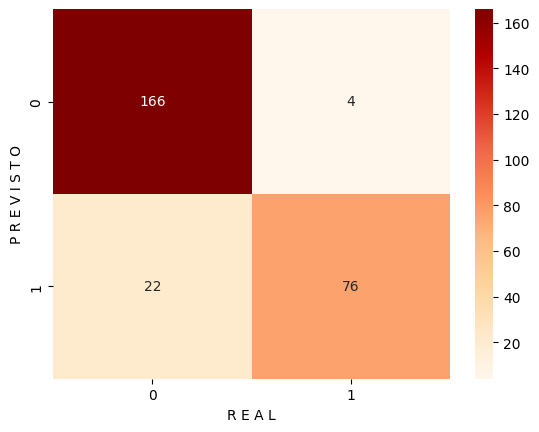

In [348]:
sns.heatmap(confusion_matrix(y_test, pred_proba), cmap='OrRd', annot=True, fmt='')
plt.xlabel('R E A L')
plt.ylabel('P R E V I S T O')
plt.show()

## Customização de Hyper-Parâmetros

In [349]:
from sklearn.model_selection import GridSearchCV

In [350]:
rf_params = {
    'n_estimators':[100,200],
    'max_depth': [2,4],
    'min_samples_leaf': [1,2,3]
}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=123),
                  param_grid = rf_params, verbose=True)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.8908903225806452
RandomForestClassifier(max_depth=4, min_samples_leaf=2, random_state=123)


In [351]:
gd_pred= gd.predict(X_test)
gd_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.


### Ensembling
Uma forma de aumentar a acuracidade ou performance do modelo preditivo. Ensembling é a combinação de vários modelos preditivos de forma a ter uma versão final mais poderosa e mais estável. Ensembling pode ser feito de 3 formas:


*   Classificão de Votos (Voting Classifier)
*   Ensacamento (Bagging)
*   Impulsionamento (Boosting)






*   Classificão de Votos (Voting Classifier)







In [352]:
misturados = [('KNN',KNeighborsClassifier(n_neighbors=10)),
                  ('RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                  ('RFor',RandomForestClassifier(n_estimators=100,random_state=123)),
                  ('LR',LogisticRegression(C=0.05)),
                  ('DT',DecisionTreeClassifier(random_state=123)),
                  ('NB',GaussianNB()),
                  ('svm',SVC(kernel='linear',probability=True))
                 ]

In [353]:
from sklearn.ensemble import VotingClassifier
meu_ensemble = VotingClassifier(estimators=misturados, voting='soft').fit(X_train, y_train)
print('Score: ', meu_ensemble.score(X_test, y_test))

cross = cross_val_score(meu_ensemble, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross)

Score:  0.8917910447761194
Score cross-validado [0.96296296 0.96296296 0.77777778 0.92592593 0.88888889 0.96296296
 0.85185185 0.77777778 0.92307692 0.88461538]


In [354]:
print('cross-validado media: ', cross.mean())

cross-validado media:  0.8918803418803419


* ### Ensacamento
O Ensacamento aplica classificadores similares em pequenas partições, depois tira a média reduzindo a variância. Diferente da técnica de Classificação de Votos, Ensacamento usa classificadores similares aumentando a estabilidade. 

* #### Ensacamento KNN
Ele é ideal para usar com modelos que possuem muita variância. Pode ser usado com um pequeno valor de n_neighbours, como com um pequeno valor de n_estimators.


In [355]:
from sklearn.ensemble import BaggingClassifier

In [356]:
knn = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=3), random_state=123, n_estimators=100)

knn.fit(X_train, y_train)
knn_pred   = knn.predict(X_test)

print('Score', knn.score(X_test, y_test))
cross = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

Score 0.7276119402985075
Score cross-validado 0.72008547008547


* #### Ensacamento DecisionTree

In [357]:
dtree = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=123, n_estimators=100)

dtree.fit(X_train, y_train)
dtree_pred   = dtree.predict(X_test)

print('Score', dtree.score(X_test, y_test))
cross = cross_val_score(dtree, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

Score 0.8768656716417911
Score cross-validado 0.8735042735042734


* ### Impulsionamento
Impulsionamento é uma técnica ensembling que usa aprendizado sequenciado de classificadores. É um melhoramento gradual de um modelo fraco. O modelo é treinado no dataframe completo, de forma a focar nos erros, tentando melhorá-los iterativamente de forma contínua. 

* #### Exemplos (Impulsionamento Adaptativo): 
    * AdaBoost  
    * GradientBoostingClassifier 
<br>

### GradientBoostingClassifier

In [358]:
grad = GradientBoostingClassifier(n_estimators=100, random_state=123  , learning_rate=0.1) 
grad.fit(X_test,y_test)
grad_pred = dtree.predict(X_test) 
cross = cross_val_score(grad, X_test, y_test, cv=10, scoring='accuracy')

print('Score', grad.score(X_test, y_test))
cross = cross_val_score(grad, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())


Score 0.9738805970149254
Score cross-validado 0.86994301994302


## Configurando Hyper-Parâmetros para o AdaBoost

In [359]:
n_estimator = [100,200]
learn_rate= [0.05,0.1,0.3]
hyper = {'n_estimators': n_estimator, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X_train, y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8909032258064518
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


In [360]:
adaboost_pred = gd.predict(X_test)


### Importancia de recursos (feature Importance)


In [361]:
rf_params = {
  'n_jobs':-1,
  'n_estimators':100,
  'max_depth':2,
  'min_samples_leaf':2,
  'verbose':0 
}

In [362]:
rf=ModeloAuxiliar(clf=RandomForestClassifier, seed=123, params= rf_params )

In [363]:
rf_features = rf.feature_importances(X_train, y_train)

In [364]:
cols = X_train.columns.values
cols

array(['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino',
       'Titulo_Outros', 'Titulo_Solteira', 'ExpectativaDeVidaa_morrer',
       'ExpectativaDeVidaa_viver', 'Sexo_mulher', 'Idade', 'Familiares',
       'Sozinho'], dtype=object)

In [365]:
feature_dataframe = pd.DataFrame({'recursos': cols,
                                  'Importancia de Recursos RForest': rf_features})

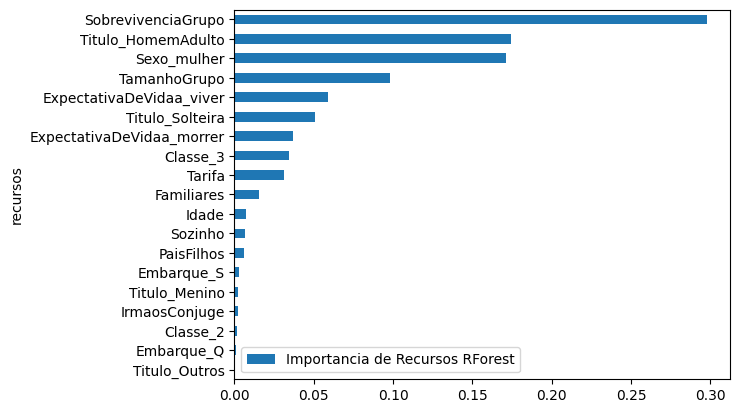

In [366]:
feature_dataframe.sort_values(by='Importancia de Recursos RForest').plot.barh(x='recursos')
plt.show()

In [367]:
meu_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('RBF', SVC(C=0.5, gamma=0.1, probability=True)),
                             ('RFor', RandomForestClassifier(random_state=123)),
                             ('LR', LogisticRegression(C=0.05)),
                             ('DT', DecisionTreeClassifier(random_state=123)),
                             ('NB', GaussianNB()),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [368]:
meu_ensemble.score(X_test, y_test)

0.8917910447761194

In [370]:
test[recursos].shape

(418, 19)

In [371]:
X_test.shape

(268, 19)

In [372]:
ensemble_pred = meu_ensemble.predict(test[recursos])

In [373]:
ensemble_pred.shape

(418,)

In [376]:
test.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

### submissão

In [380]:
submissao = pd.DataFrame({'PassagerId': test.index,
                          'Survived': ensemble_pred})

In [381]:
submissao.head()

,PassagerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [382]:
submissao['Survived'] = submissao['Survived'].astype('int')

In [383]:
submissao.head()

,PassagerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [384]:
submissao.to_csv('meu_ensemble.csv', index=False)